In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [4]:
batting_records=pd.read_csv('batting_records.csv')

In [17]:
batting_records.drop_duplicates(inplace=True)

In [18]:
batting_records

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,V Kohli,RCB,2008-2024,252,244,37,8004,113*,38.66,6065,131.97,8,55,10,705,272
1,S Dhawan,DC/DCH/MI/PBKS/SRH,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152
2,RG Sharma,DCH/MI,2008-2024,257,252,29,6628,109*,29.72,5054,131.14,2,43,17,599,280
3,DA Warner,DC/SRH,2009-2024,184,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236
4,SK Raina,CSK/GL,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Gurkeerat Singh,KXIP/RCB,2012-2020,41,32,8,511,65,21.29,422,121.09,0,2,4,55,11
146,OA Shah,KKR/Kochi/RR,2010-2013,23,22,7,506,76,33.73,389,130.07,0,4,0,34,23
147,PC Valthaty,KXIP/RR,2009-2013,23,23,1,505,120*,22.95,418,120.81,1,2,1,60,20
148,SW Billings,CSK/DC/KKR,2016-2022,30,27,1,503,56,19.34,388,129.63,0,3,3,40,20


In [19]:
batting_records.tail()

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
145,Gurkeerat Singh,KXIP/RCB,2012-2020,41,32,8,511,65,21.29,422,121.09,0,2,4,55,11
146,OA Shah,KKR/Kochi/RR,2010-2013,23,22,7,506,76,33.73,389,130.07,0,4,0,34,23
147,PC Valthaty,KXIP/RR,2009-2013,23,23,1,505,120*,22.95,418,120.81,1,2,1,60,20
148,SW Billings,CSK/DC/KKR,2016-2022,30,27,1,503,56,19.34,388,129.63,0,3,3,40,20
149,RR Rossouw,DC/PBKS/RCB,2014-2024,22,22,2,473,82*,23.65,308,153.57,0,2,4,45,25


In [20]:
batting_records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           150 non-null    object 
 1   team           150 non-null    object 
 2   span           150 non-null    object 
 3   matches        150 non-null    int64  
 4   innings        150 non-null    int64  
 5   not_out        150 non-null    int64  
 6   runs           150 non-null    int64  
 7   highest_score  150 non-null    object 
 8   average        150 non-null    float64
 9   balls_faced    150 non-null    int64  
 10  strike_rate    150 non-null    float64
 11  100s           150 non-null    int64  
 12  50s            150 non-null    int64  
 13  duck           150 non-null    int64  
 14  4s             150 non-null    int64  
 15  6s             150 non-null    int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 19.9+ KB


In [21]:
batting_records.describe()

,matches,innings,not_out,runs,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,90.720000,80.600000,15.120000,1901.966667,28.301133,1422.893333,134.566133,0.660000,10.680000,5.193333,173.613333,76.026667
std,58.375678,52.250943,14.088369,1501.813054,7.071611,1120.958447,14.119812,1.294438,11.198226,4.067710,145.533676,63.814953
min,16.000000,16.000000,0.000000,473.000000,11.140000,308.000000,106.800000,0.000000,0.000000,0.000000,28.000000,9.000000
25%,43.250000,39.000000,5.250000,798.250000,22.787500,593.500000,123.915000,0.000000,3.000000,2.000000,70.000000,34.250000
50%,76.000000,66.500000,11.000000,1388.500000,27.685000,1045.500000,132.935000,0.000000,7.000000,4.000000,116.000000,49.500000
75%,120.250000,106.000000,20.000000,2595.500000,32.290000,1944.500000,141.925000,1.000000,13.750000,7.000000,238.750000,97.750000
max,264.000000,252.000000,95.000000,8004.000000,48.630000,6065.000000,175.530000,8.000000,62.000000,18.000000,768.000000,357.000000


In [22]:
batting_records.duplicated().sum()

0

In [23]:
batting_records.isnull().sum()

name             0
team             0
span             0
matches          0
innings          0
not_out          0
runs             0
highest_score    0
average          0
balls_faced      0
strike_rate      0
100s             0
50s              0
duck             0
4s               0
6s               0
dtype: int64

In [24]:
batting_records.average.unique()

array([38.66, 35.25, 29.72, 40.52, 32.51, 39.12, 39.7 , 39.72, 27.51,
       26.31, 45.46, 30.14, 35.99, 30.68, 28.23, 31.  , 30.99, 29.16,
       32.08, 38.1 , 28.67, 35.31, 37.83, 29.12, 31.25, 32.23, 27.39,
       24.24, 36.09, 27.69, 22.6 , 24.74, 24.77, 27.55, 22.74, 28.43,
       28.65, 25.93, 28.69, 34.51, 29.22, 39.95, 28.55, 28.39, 41.75,
       34.83, 27.26, 35.46, 25.19, 27.22, 39.78, 38.76, 23.94, 28.27,
       28.6 , 32.16, 20.8 , 28.72, 25.95, 21.46, 22.56, 32.14, 34.54,
       25.14, 20.72, 17.04, 30.04, 23.74, 28.73, 18.31, 30.65, 22.66,
       33.33, 25.5 , 25.45, 34.07, 31.57, 26.97, 31.07, 22.37, 24.43,
       22.78, 39.86, 26.81, 21.49, 25.34, 36.9 , 22.1 , 39.96, 47.  ,
       25.42, 25.32, 37.07, 27.77, 30.15, 38.19, 22.38, 36.07, 24.35,
       26.5 , 28.45, 24.6 , 48.63, 30.79, 27.68, 25.22, 19.13, 15.71,
       13.33, 34.73, 21.  , 19.82, 36.76, 27.42, 22.23, 28.42, 22.81,
       23.35, 41.58, 21.12, 17.68, 19.55, 24.55, 27.25, 34.36, 24.38,
       11.14, 22.07,

In [25]:
batting_records.loc[batting_records.innings == batting_records.not_out].count()

name             0
team             0
span             0
matches          0
innings          0
not_out          0
runs             0
highest_score    0
average          0
balls_faced      0
strike_rate      0
100s             0
50s              0
duck             0
4s               0
6s               0
dtype: int64

In [32]:
batting_records[(batting_records.team.str.contains(r'\bRCB\b'))]


,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,V Kohli,RCB,2008-2024,252,244,37,8004,113*,38.66,6065,131.97,8,55,10,705,272
6,AB de Villiers,DC/RCB,2008-2021,184,170,40,5162,133*,39.70,3403,151.68,3,40,10,413,251
7,CH Gayle,KKR/KXIP/PBKS/RCB,2009-2021,142,141,16,4965,175*,39.72,3333,148.96,6,31,8,404,357
8,RV Uthappa,CSK/KKR/MI/PWI/RCB/RR,2008-2022,205,197,17,4952,88,27.51,3799,130.35,0,27,8,481,182
9,KD Karthik,DC/GL/KKR/KXIP/MI/RCB,2008-2024,257,234,50,4842,97*,26.31,3577,135.36,0,22,18,466,161
10,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2013-2024,132,123,20,4683,132*,45.46,3479,134.60,4,37,4,400,187
12,F du Plessis,CSK/RCB/RPS,2012-2024,145,138,11,4571,96,35.99,3352,136.36,0,37,7,421,166
16,SR Watson,CSK/RCB/RR,2008-2020,145,141,16,3874,117*,30.99,2809,137.91,4,21,7,375,190
17,MK Pandey,DC/KKR/LSG/MI/PWI/RCB/SRH,2008-2024,171,159,27,3850,114*,29.16,3179,121.10,1,22,14,335,110
24,Q de Kock,DC/LSG/MI/RCB/SRH,2013-2024,107,107,6,3157,140*,31.25,2352,134.22,2,23,4,316,123


In [33]:
batting_records.shape


(150, 16)

In [34]:
batting_records.average = batting_records.average.astype('float64')

In [35]:
batting_records.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           150 non-null    object 
 1   team           150 non-null    object 
 2   span           150 non-null    object 
 3   matches        150 non-null    int64  
 4   innings        150 non-null    int64  
 5   not_out        150 non-null    int64  
 6   runs           150 non-null    int64  
 7   highest_score  150 non-null    object 
 8   average        150 non-null    float64
 9   balls_faced    150 non-null    int64  
 10  strike_rate    150 non-null    float64
 11  100s           150 non-null    int64  
 12  50s            150 non-null    int64  
 13  duck           150 non-null    int64  
 14  4s             150 non-null    int64  
 15  6s             150 non-null    int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 19.9+ KB


In [43]:
teams_split = batting_records['team'].str.split('/')

all_teams = [team for sublist in teams_split for team in sublist]

unique_teams = pd.Series(all_teams).unique()
unique_teams


array(['RCB', 'DC', 'DCH', 'MI', 'PBKS', 'SRH', 'CSK', 'GL', 'RPS', 'KKR',
       'KXIP', 'PWI', 'RR', 'LSG', 'GT', 'Kochi'], dtype=object)

In [45]:
batting_records.team.str.isnumeric().sum()

0

In [46]:
batting_records.nunique(axis=0)

name             150
team             120
span              58
matches           95
innings           97
not_out           43
runs             147
highest_score    109
average          147
balls_faced      146
strike_rate      147
100s               8
50s               37
duck              19
4s               122
6s                91
dtype: int64

In [47]:
batting_records.loc[batting_records['name'].duplicated(keep = False)]

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s


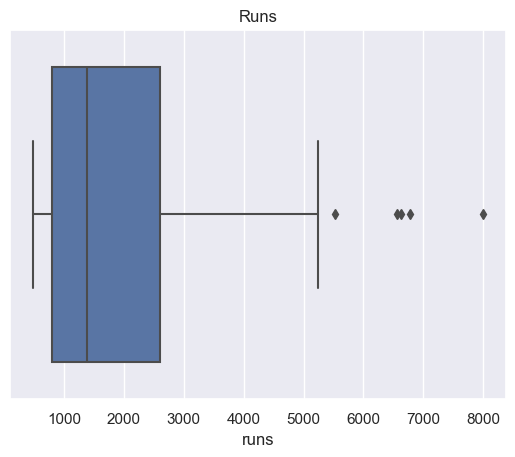

In [48]:
sns.boxplot(x='runs',data = batting_records)
plt.title("Runs")
plt.show()

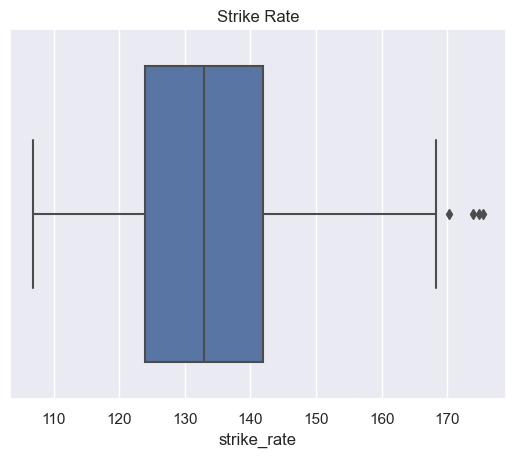

In [49]:
sns.boxplot(x='strike_rate',data = batting_records)
plt.title("Strike Rate")
plt.show()

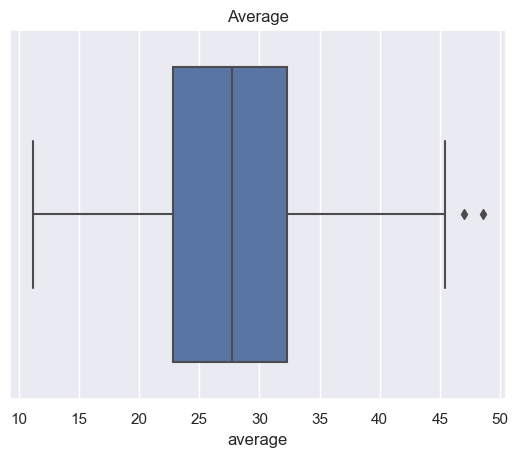

In [50]:
sns.boxplot(x='average',data = batting_records)
plt.title("Average")
plt.show()

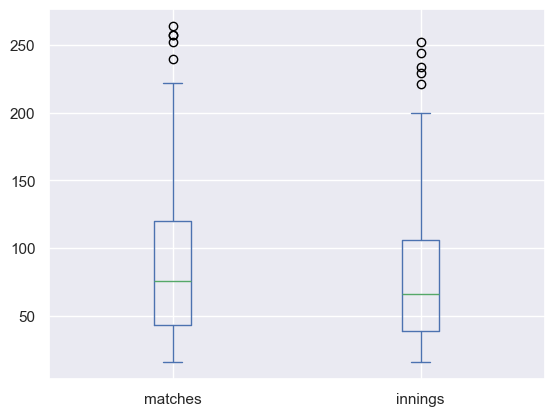

In [51]:
batting_records[['matches','innings']].plot(kind='box')
plt.show()

In [52]:
# Dropping Players who have played 4 innings or less
batting_records.drop(batting_records[(batting_records.innings <= 3) | (batting_records.balls_faced < 25)].index, inplace=True)

In [56]:
#PERFORMANCE METRICS

In [55]:
batting_records[(batting_records['100s'] + batting_records['50s']) > 3]

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,V Kohli,RCB,2008-2024,252,244,37,8004,113*,38.66,6065,131.97,8,55,10,705,272
1,S Dhawan,DC/DCH/MI/PBKS/SRH,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152
2,RG Sharma,DCH/MI,2008-2024,257,252,29,6628,109*,29.72,5054,131.14,2,43,17,599,280
3,DA Warner,DC/SRH,2009-2024,184,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236
4,SK Raina,CSK/GL,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,A Badoni,LSG,2022-2024,42,35,9,634,59*,24.38,473,134.03,0,4,2,46,24
131,JJ Roy,DC/GL/KKR/SRH,2017-2023,21,21,2,614,91*,32.31,443,138.60,0,4,0,75,21
132,JD Ryder,PWI/RCB,2009-2012,29,29,1,604,86,21.57,458,131.87,0,4,4,69,19
134,HM Amla,KXIP,2016-2017,16,16,3,577,104*,44.38,407,141.76,2,3,2,60,21


In [57]:
batting_records[(batting_records['100s']) > 0]

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,V Kohli,RCB,2008-2024,252,244,37,8004,113*,38.66,6065,131.97,8,55,10,705,272
1,S Dhawan,DC/DCH/MI/PBKS/SRH,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152
2,RG Sharma,DCH/MI,2008-2024,257,252,29,6628,109*,29.72,5054,131.14,2,43,17,599,280
3,DA Warner,DC/SRH,2009-2024,184,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236
4,SK Raina,CSK/GL,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
6,AB de Villiers,DC/RCB,2008-2021,184,170,40,5162,133*,39.70,3403,151.68,3,40,10,413,251
7,CH Gayle,KKR/KXIP/PBKS/RCB,2009-2021,142,141,16,4965,175*,39.72,3333,148.96,6,31,8,404,357
10,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2013-2024,132,123,20,4683,132*,45.46,3479,134.60,4,37,4,400,187
11,AM Rahane,CSK/DC/KKR/MI/RPS/RR,2008-2024,185,171,17,4642,105*,30.14,3761,123.42,2,30,13,478,103
13,SV Samson,DC/RR,2013-2024,168,163,19,4419,119,30.68,3180,138.96,3,25,11,352,206


In [58]:
batting_records[(batting_records['50s']) > 3]

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s
0,V Kohli,RCB,2008-2024,252,244,37,8004,113*,38.66,6065,131.97,8,55,10,705,272
1,S Dhawan,DC/DCH/MI/PBKS/SRH,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152
2,RG Sharma,DCH/MI,2008-2024,257,252,29,6628,109*,29.72,5054,131.14,2,43,17,599,280
3,DA Warner,DC/SRH,2009-2024,184,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236
4,SK Raina,CSK/GL,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,PD Salt,DC/KKR,2023-2024,21,21,2,653,89*,34.36,372,175.53,0,6,3,74,34
128,A Badoni,LSG,2022-2024,42,35,9,634,59*,24.38,473,134.03,0,4,2,46,24
131,JJ Roy,DC/GL/KKR/SRH,2017-2023,21,21,2,614,91*,32.31,443,138.60,0,4,0,75,21
132,JD Ryder,PWI/RCB,2009-2012,29,29,1,604,86,21.57,458,131.87,0,4,4,69,19


In [59]:
boundaries = (batting_records['4s'] + batting_records['6s'])
batting_records['boundary_per_ball'] = np.round(boundaries/batting_records['balls_faced'],3)

In [60]:
batting_records

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball
0,V Kohli,RCB,2008-2024,252,244,37,8004,113*,38.66,6065,131.97,8,55,10,705,272,0.161
1,S Dhawan,DC/DCH/MI/PBKS/SRH,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152,0.173
2,RG Sharma,DCH/MI,2008-2024,257,252,29,6628,109*,29.72,5054,131.14,2,43,17,599,280,0.174
3,DA Warner,DC/SRH,2009-2024,184,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236,0.191
4,SK Raina,CSK/GL,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203,0.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Gurkeerat Singh,KXIP/RCB,2012-2020,41,32,8,511,65,21.29,422,121.09,0,2,4,55,11,0.156
146,OA Shah,KKR/Kochi/RR,2010-2013,23,22,7,506,76,33.73,389,130.07,0,4,0,34,23,0.147
147,PC Valthaty,KXIP/RR,2009-2013,23,23,1,505,120*,22.95,418,120.81,1,2,1,60,20,0.191
148,SW Billings,CSK/DC/KKR,2016-2022,30,27,1,503,56,19.34,388,129.63,0,3,3,40,20,0.155


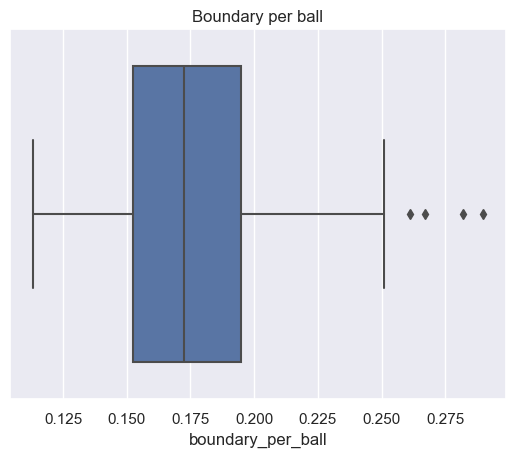

In [61]:
sns.boxplot(x='boundary_per_ball',data = batting_records)
plt.title("Boundary per ball")
plt.show()

In [63]:
batting_records.loc[batting_records['boundary_per_ball']>0.275].sort_values('boundary_per_ball',ascending=False)

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball
127,PD Salt,DC/KKR,2023-2024,21,21,2,653,89*,34.36,372,175.53,0,6,3,74,34,0.290
67,SP Narine,KKR,2012-2024,177,110,20,1534,109,17.04,925,165.83,1,7,16,164,97,0.282


In [64]:
batting_records['boundary_index'] = np.round(boundaries / batting_records.innings,3) 

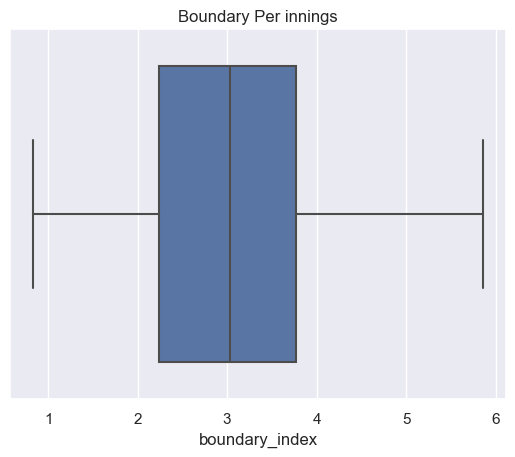

In [65]:
sns.boxplot(x='boundary_index',data = batting_records)
plt.title("Boundary Per innings")
plt.show()

In [ ]:
#NO MAJOR OUTLIERS AS SEEN FROM BOXPLOT

In [66]:
batting_records['finishing_index'] = np.round(batting_records['not_out'] / batting_records.innings, 3)

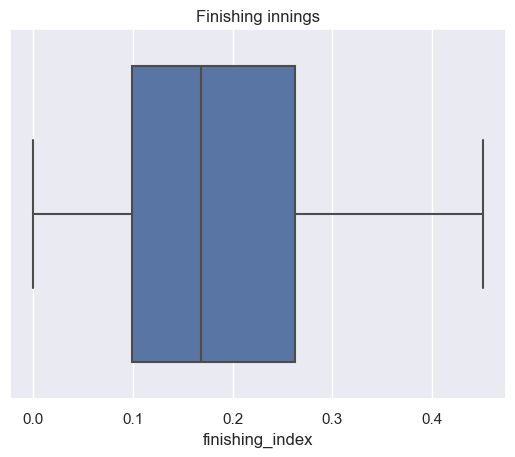

In [67]:
sns.boxplot(x='finishing_index',data = batting_records)
plt.title("Finishing innings")
plt.show()

In [68]:
#NO MAJOR OUTLIERS AS SEEN FROM BOXPLOT

In [69]:
batting_records['duck_index'] = np.round(batting_records['duck'] / batting_records.innings, 3)

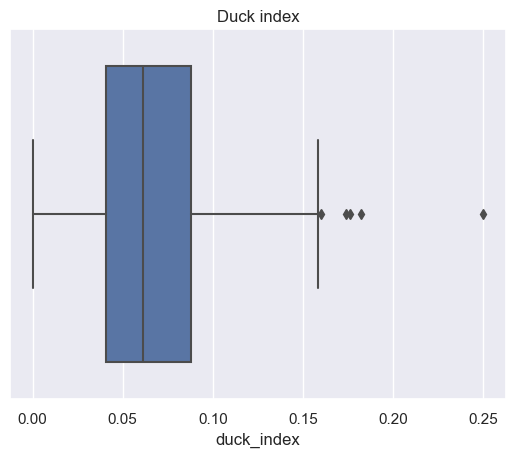

In [70]:
sns.boxplot(x='duck_index',data = batting_records)
plt.title("Duck index")
plt.show()

In [71]:
batting_records.loc[batting_records['duck_index']>0.14]

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index
57,Mandeep Singh,DC/KKR/KXIP/PBKS/RCB,2010-2023,111,98,16,1706,77*,20.80,1388,122.91,0,6,15,176,38,0.154,2.184,0.163,0.153
67,SP Narine,KKR,2012-2024,177,110,20,1534,109,17.04,925,165.83,1,7,16,164,97,0.282,2.373,0.182,0.145
109,Harbhajan Singh,CSK/KKR/MI,2008-2021,163,90,37,833,64,15.71,604,137.91,0,1,13,79,42,0.200,1.344,0.411,0.144
114,TM Head,RCB/SRH,2016-2024,25,25,4,772,102,36.76,444,173.87,1,5,4,76,40,0.261,4.640,0.160,0.160
127,PD Salt,DC/KKR,2023-2024,21,21,2,653,89*,34.36,372,175.53,0,6,3,74,34,0.290,5.143,0.095,0.143
129,PP Chawla,CSK/KKR/KXIP/MI,2008-2024,192,92,36,624,24*,11.14,563,110.83,0,0,16,56,20,0.135,0.826,0.391,0.174
130,CH Morris,CSK/DC/RCB/RR,2013-2021,81,51,23,618,82*,22.07,398,155.27,0,2,9,41,35,0.191,1.490,0.451,0.176
137,Rashid Khan,GT/SRH,2017-2024,121,60,23,545,79*,14.72,337,161.72,0,1,15,39,38,0.228,1.283,0.383,0.250
144,M Manhas,CSK/DC/PWI,2008-2014,55,38,15,514,42*,22.34,470,109.36,0,0,6,43,10,0.113,1.395,0.395,0.158
149,RR Rossouw,DC/PBKS/RCB,2014-2024,22,22,2,473,82*,23.65,308,153.57,0,2,4,45,25,0.227,3.182,0.091,0.182


In [72]:
runs_without_boundaries = batting_records.runs - (4*batting_records['4s'] + 6*batting_records['6s'])
batting_records['runs_without_boundary_index'] = np.round(runs_without_boundaries / batting_records.innings,3)

In [73]:
batting_records

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index
0,V Kohli,RCB,2008-2024,252,244,37,8004,113*,38.66,6065,131.97,8,55,10,705,272,0.161,4.004,0.152,0.041,14.557
1,S Dhawan,DC/DCH/MI/PBKS/SRH,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152,0.173,4.163,0.131,0.050,12.602
2,RG Sharma,DCH/MI,2008-2024,257,252,29,6628,109*,29.72,5054,131.14,2,43,17,599,280,0.174,3.488,0.115,0.067,10.127
3,DA Warner,DC/SRH,2009-2024,184,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236,0.191,4.886,0.120,0.060,13.571
4,SK Raina,CSK/GL,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203,0.175,3.545,0.150,0.040,11.430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Gurkeerat Singh,KXIP/RCB,2012-2020,41,32,8,511,65,21.29,422,121.09,0,2,4,55,11,0.156,2.062,0.250,0.125,7.031
146,OA Shah,KKR/Kochi/RR,2010-2013,23,22,7,506,76,33.73,389,130.07,0,4,0,34,23,0.147,2.591,0.318,0.000,10.545
147,PC Valthaty,KXIP/RR,2009-2013,23,23,1,505,120*,22.95,418,120.81,1,2,1,60,20,0.191,3.478,0.043,0.043,6.304
148,SW Billings,CSK/DC/KKR,2016-2022,30,27,1,503,56,19.34,388,129.63,0,3,3,40,20,0.155,2.222,0.037,0.111,8.259


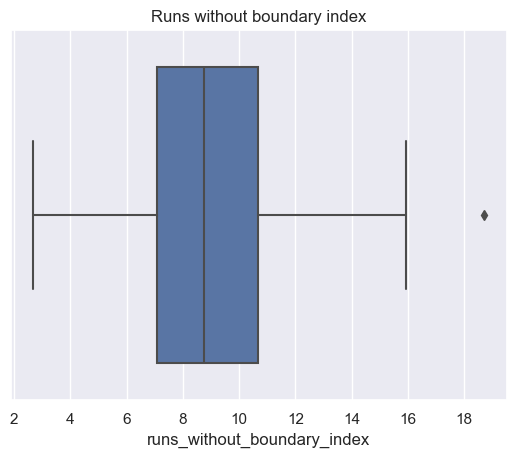

In [74]:
sns.boxplot(x='runs_without_boundary_index',data = batting_records)
plt.title("Runs without boundary index")
plt.show()

In [75]:
batting_records.loc[batting_records.runs_without_boundary_index > 16].sort_values('runs_without_boundary_index',ascending = False)


,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index
91,B Sai Sudharsan,GT,2022-2024,25,25,3,1034,103,47.0,743,139.16,1,6,0,95,31,0.17,5.04,0.12,0.0,18.72


In [76]:
batting_records['big_match_index'] = np.round(((2 * batting_records['100s']) + batting_records['50s']) / batting_records.innings,3)

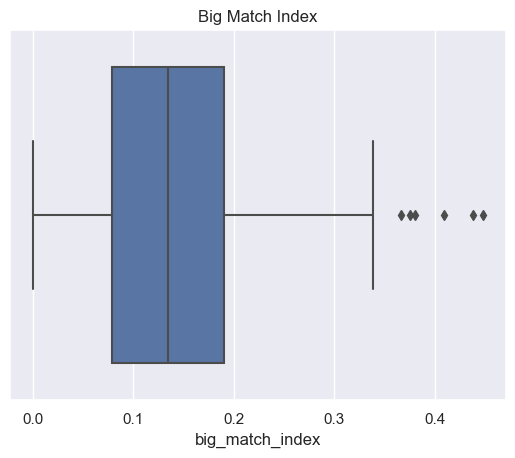

In [77]:
sns.boxplot(x='big_match_index',data = batting_records)
plt.title("Big Match Index")
plt.show()

In [79]:
batting_records.loc[(batting_records.big_match_index > 0.1)].sort_values('big_match_index',ascending = False)


,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index,big_match_index
90,LMP Simmons,MI,2014-2017,29,29,2,1079,100*,39.96,852,126.64,1,11,2,109,44,0.180,5.276,0.069,0.069,13.069,0.448
134,HM Amla,KXIP,2016-2017,16,16,3,577,104*,44.38,407,141.76,2,3,2,60,21,0.199,5.062,0.188,0.125,13.188,0.438
104,DP Conway,CSK,2022-2023,23,22,3,924,92*,48.63,654,141.28,0,9,2,99,30,0.197,5.864,0.136,0.091,15.818,0.409
3,DA Warner,DC/SRH,2009-2024,184,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236,0.191,4.886,0.120,0.060,13.571,0.380
111,RM Patidar,RCB,2021-2024,27,24,1,799,112*,34.73,503,158.84,1,7,1,51,54,0.209,4.375,0.042,0.042,11.292,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Yuvraj Singh,DC/KXIP/MI/PWI/RCB/SRH,2008-2019,132,126,15,2750,83,24.77,2120,129.71,0,13,4,217,149,0.173,2.905,0.119,0.032,7.841,0.103
112,MS Bisla,KKR/KXIP/RCB,2010-2015,39,39,1,798,92,21.00,702,113.67,0,4,3,93,23,0.165,2.974,0.026,0.077,7.385,0.103
82,R Parag,RR,2019-2024,70,58,10,1173,84*,24.43,868,135.13,0,6,3,84,60,0.166,2.483,0.172,0.052,8.224,0.103
27,WP Saha,CSK/GT/KKR/KXIP/SRH,2008-2024,170,145,24,2934,115*,24.24,2300,127.56,1,13,7,296,87,0.167,2.641,0.166,0.048,8.469,0.103


In [80]:
batting_records[batting_records['100s'] > 0]

,name,team,span,matches,innings,not_out,runs,highest_score,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index,big_match_index
0,V Kohli,RCB,2008-2024,252,244,37,8004,113*,38.66,6065,131.97,8,55,10,705,272,0.161,4.004,0.152,0.041,14.557,0.291
1,S Dhawan,DC/DCH/MI/PBKS/SRH,2008-2024,222,221,29,6769,106*,35.25,5324,127.14,2,51,11,768,152,0.173,4.163,0.131,0.050,12.602,0.249
2,RG Sharma,DCH/MI,2008-2024,257,252,29,6628,109*,29.72,5054,131.14,2,43,17,599,280,0.174,3.488,0.115,0.067,10.127,0.187
3,DA Warner,DC/SRH,2009-2024,184,184,22,6565,126,40.52,4697,139.77,4,62,11,663,236,0.191,4.886,0.120,0.060,13.571,0.380
4,SK Raina,CSK/GL,2008-2021,205,200,30,5528,100*,32.51,4043,136.73,1,39,8,506,203,0.175,3.545,0.150,0.040,11.430,0.205
6,AB de Villiers,DC/RCB,2008-2021,184,170,40,5162,133*,39.70,3403,151.68,3,40,10,413,251,0.195,3.906,0.235,0.059,11.788,0.271
7,CH Gayle,KKR/KXIP/PBKS/RCB,2009-2021,142,141,16,4965,175*,39.72,3333,148.96,6,31,8,404,357,0.228,5.397,0.113,0.057,8.560,0.305
10,KL Rahul,KXIP/LSG/PBKS/RCB/SRH,2013-2024,132,123,20,4683,132*,45.46,3479,134.60,4,37,4,400,187,0.169,4.772,0.163,0.033,15.943,0.366
11,AM Rahane,CSK/DC/KKR/MI/RPS/RR,2008-2024,185,171,17,4642,105*,30.14,3761,123.42,2,30,13,478,103,0.154,3.398,0.099,0.076,12.351,0.199
13,SV Samson,DC/RR,2013-2024,168,163,19,4419,119,30.68,3180,138.96,3,25,11,352,206,0.175,3.423,0.117,0.067,10.890,0.190


In [81]:
batting_records.describe()

,matches,innings,not_out,runs,average,balls_faced,strike_rate,100s,50s,duck,4s,6s,boundary_per_ball,boundary_index,finishing_index,duck_index,runs_without_boundary_index,big_match_index
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,90.720000,80.600000,15.120000,1901.966667,28.301133,1422.893333,134.566133,0.660000,10.680000,5.193333,173.613333,76.026667,0.176333,3.052960,0.187193,0.067647,9.035660,0.143480
std,58.375678,52.250943,14.088369,1501.813054,7.071611,1120.958447,14.119812,1.294438,11.198226,4.067710,145.533676,63.814953,0.033137,1.061459,0.113073,0.041479,2.786831,0.097553
min,16.000000,16.000000,0.000000,473.000000,11.140000,308.000000,106.800000,0.000000,0.000000,0.000000,28.000000,9.000000,0.113000,0.826000,0.000000,0.000000,2.683000,0.000000
25%,43.250000,39.000000,5.250000,798.250000,22.787500,593.500000,123.915000,0.000000,3.000000,2.000000,70.000000,34.250000,0.152250,2.243000,0.099500,0.041000,7.061750,0.079000
50%,76.000000,66.500000,11.000000,1388.500000,27.685000,1045.500000,132.935000,0.000000,7.000000,4.000000,116.000000,49.500000,0.172500,3.028000,0.168500,0.061000,8.746500,0.135000
75%,120.250000,106.000000,20.000000,2595.500000,32.290000,1944.500000,141.925000,1.000000,13.750000,7.000000,238.750000,97.750000,0.195000,3.764250,0.262750,0.088000,10.682000,0.190000
max,264.000000,252.000000,95.000000,8004.000000,48.630000,6065.000000,175.530000,8.000000,62.000000,18.000000,768.000000,357.000000,0.290000,5.864000,0.451000,0.250000,18.720000,0.448000


In [82]:
batter = batting_records[['name','team','average','strike_rate','boundary_per_ball','boundary_index','finishing_index','runs_without_boundary_index','big_match_index']]

In [83]:
batter.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,28.301133,134.566133,0.176333,3.052960,0.187193,9.035660,0.143480
std,7.071611,14.119812,0.033137,1.061459,0.113073,2.786831,0.097553
min,11.140000,106.800000,0.113000,0.826000,0.000000,2.683000,0.000000
25%,22.787500,123.915000,0.152250,2.243000,0.099500,7.061750,0.079000
50%,27.685000,132.935000,0.172500,3.028000,0.168500,8.746500,0.135000
75%,32.290000,141.925000,0.195000,3.764250,0.262750,10.682000,0.190000
max,48.630000,175.530000,0.290000,5.864000,0.451000,18.720000,0.448000


In [84]:
batter_for_clustering = batter.copy().drop(['name','team'],axis=1)
batter_for_clustering

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,38.66,131.97,0.161,4.004,0.152,14.557,0.291
1,35.25,127.14,0.173,4.163,0.131,12.602,0.249
2,29.72,131.14,0.174,3.488,0.115,10.127,0.187
3,40.52,139.77,0.191,4.886,0.120,13.571,0.380
4,32.51,136.73,0.175,3.545,0.150,11.430,0.205
...,...,...,...,...,...,...,...
145,21.29,121.09,0.156,2.062,0.250,7.031,0.062
146,33.73,130.07,0.147,2.591,0.318,10.545,0.182
147,22.95,120.81,0.191,3.478,0.043,6.304,0.174
148,19.34,129.63,0.155,2.222,0.037,8.259,0.111


In [85]:
batting_records['prelim_metric'] = np.round((batting_records['average'] * batting_records['strike_rate']) / 100,3)

In [87]:
batting_records[['name','team','runs','average','strike_rate','prelim_metric']]

,name,team,runs,average,strike_rate,prelim_metric
0,V Kohli,RCB,8004,38.66,131.97,51.020
1,S Dhawan,DC/DCH/MI/PBKS/SRH,6769,35.25,127.14,44.817
2,RG Sharma,DCH/MI,6628,29.72,131.14,38.975
3,DA Warner,DC/SRH,6565,40.52,139.77,56.635
4,SK Raina,CSK/GL,5528,32.51,136.73,44.451
...,...,...,...,...,...,...
145,Gurkeerat Singh,KXIP/RCB,511,21.29,121.09,25.780
146,OA Shah,KKR/Kochi/RR,506,33.73,130.07,43.873
147,PC Valthaty,KXIP/RR,505,22.95,120.81,27.726
148,SW Billings,CSK/DC/KKR,503,19.34,129.63,25.070


In [88]:
batting_records[['name','team','runs','average','strike_rate','prelim_metric']].describe()

,runs,average,strike_rate,prelim_metric
count,150.000000,150.000000,150.000000,150.000000
mean,1901.966667,28.301133,134.566133,38.317613
std,1501.813054,7.071611,14.119812,11.276942
min,473.000000,11.140000,106.800000,12.346000
25%,798.250000,22.787500,123.915000,30.037000
50%,1388.500000,27.685000,132.935000,35.736000
75%,2595.500000,32.290000,141.925000,44.808250
max,8004.000000,48.630000,175.530000,68.704000


In [90]:
batting_records[['prelim_metric']].describe()

,prelim_metric
count,150.000000
mean,38.317613
std,11.276942
min,12.346000
25%,30.037000
50%,35.736000
75%,44.808250
max,68.704000


In [104]:
batting_records.loc[((batting_records['prelim_metric'] > 50) & (batting_records.runs >= 900)), 'pre-rank'] = 'Best'
batting_records.loc[((batting_records['prelim_metric'] > 50) & (batting_records.runs < 900)), 'pre-rank'] = 'Good'
batting_records.loc[((batting_records['prelim_metric'] > 42) & (batting_records['prelim_metric'] < 50) ), 'pre-rank'] = 'Good'
batting_records.loc[((batting_records['prelim_metric'] > 33) & (batting_records['prelim_metric'] < 42)), 'pre-rank'] = 'Average'
batting_records.loc[((batting_records['prelim_metric'] < 33)), 'pre-rank'] = 'Poor'

In [105]:
batting_records['pre-rank'].value_counts()

pre-rank
Poor       58
Average    42
Good       30
Best       20
Name: count, dtype: int64

In [106]:
batter['prelim_metric'] = batting_records['prelim_metric']
batter['pre-rank'] = batting_records['pre-rank']

In [113]:
batting_test = batter.sample(frac = 0.15 , random_state= 25)

In [114]:
batting_test.shape

(22, 11)

In [115]:
batting_train = batter.drop(batting_test.index)

In [116]:
batting_train.shape

(128, 11)

In [117]:
batting_test['pre-rank'].value_counts()

pre-rank
Poor       8
Average    7
Good       4
Best       3
Name: count, dtype: int64

In [118]:
from pathlib import Path
filepath_batter_for_clustering = Path('batter_for_clustering.csv') 
batting_train.to_csv(filepath_batter_for_clustering,index=False)

filepath_batter_for_clustering = Path('batter_test.csv') 
batting_test.to_csv(filepath_batter_for_clustering,index=False)

In [119]:
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [130]:
batter_for_clustering.dropna()
columns = batter_for_clustering.columns.tolist()

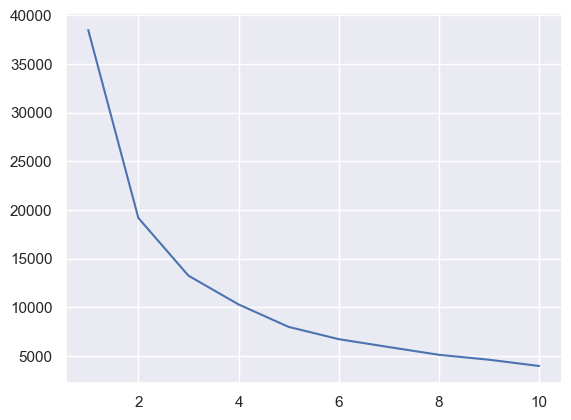

In [131]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_for_clustering)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

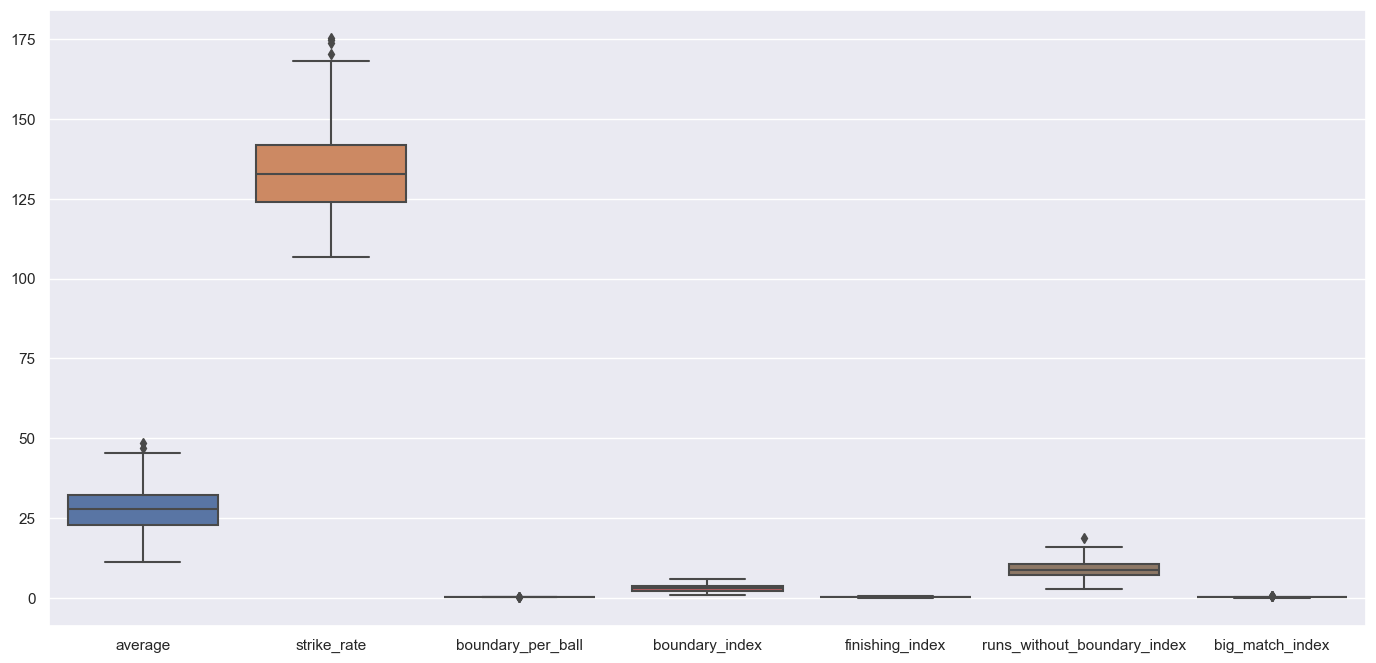

In [132]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_for_clustering)
plt.show()

In [133]:
batter_for_clustering.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,28.301133,134.566133,0.176333,3.052960,0.187193,9.035660,0.143480
std,7.071611,14.119812,0.033137,1.061459,0.113073,2.786831,0.097553
min,11.140000,106.800000,0.113000,0.826000,0.000000,2.683000,0.000000
25%,22.787500,123.915000,0.152250,2.243000,0.099500,7.061750,0.079000
50%,27.685000,132.935000,0.172500,3.028000,0.168500,8.746500,0.135000
75%,32.290000,141.925000,0.195000,3.764250,0.262750,10.682000,0.190000
max,48.630000,175.530000,0.290000,5.864000,0.451000,18.720000,0.448000


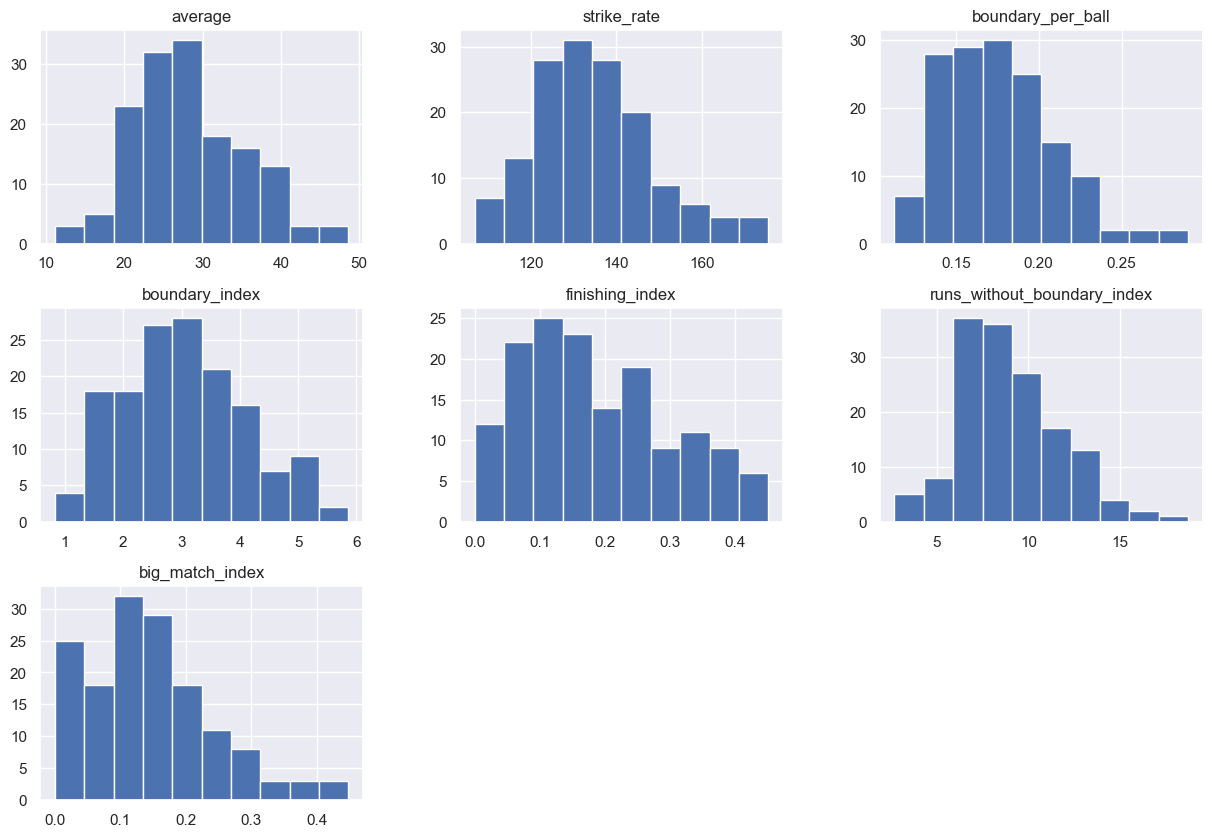

In [134]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_for_clustering.hist(ax=ax)
plt.show()

In [135]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_for_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_for_clustering, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :", #It is the mean silhouette score of all the samples in the dataset.
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.42622562102911815
For n_clusters = 3 The average silhouette_score is : 0.36616279025780923
For n_clusters = 4 The average silhouette_score is : 0.34648602607533185
For n_clusters = 5 The average silhouette_score is : 0.35499325387698166
For n_clusters = 6 The average silhouette_score is : 0.34795033190585656
For n_clusters = 7 The average silhouette_score is : 0.3376353148980054
For n_clusters = 8 The average silhouette_score is : 0.34544950506990285
For n_clusters = 9 The average silhouette_score is : 0.3365756068749073
For n_clusters = 10 The average silhouette_score is : 0.34550935321687054


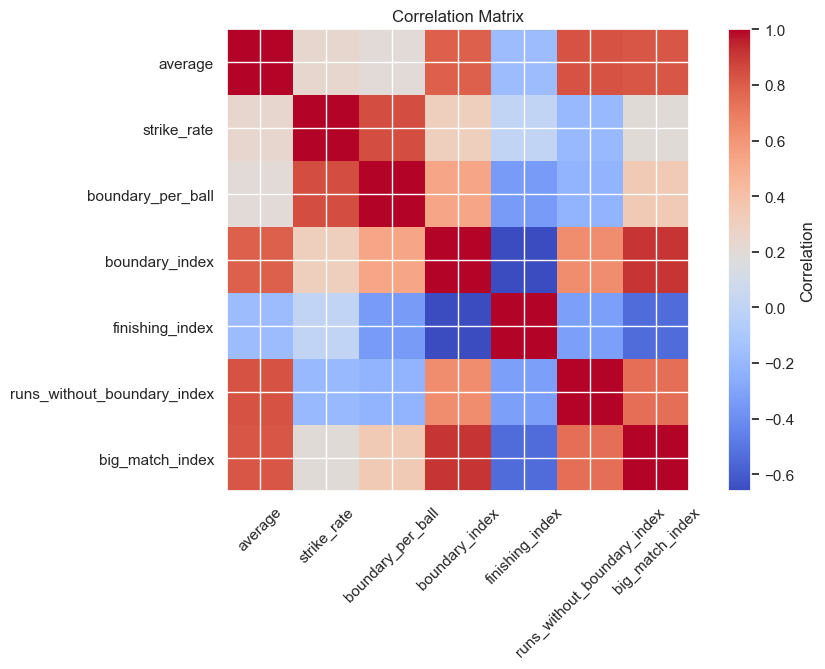

In [157]:
corr_normal = batter_for_clustering.corr()
plt.figure(figsize=(10, 6))
plt.imshow(corr_std_scaler, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_normal.columns)), corr_normal.columns, rotation=45)
plt.yticks(range(len(corr_normal.columns)), corr_normal.columns)
plt.title('Correlation Matrix')
plt.show()

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
batter_std_Scaler= scaler.fit_transform(batter_for_clustering)

batter_std_Scaler = pd.DataFrame(batter_std_Scaler,columns = columns)
batter_std_Scaler

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
0,1.469760,-0.184481,-0.464275,0.898976,-0.312286,1.987863,1.517265
1,0.985935,-0.527699,-0.100929,1.049272,-0.498628,1.283999,1.085289
2,0.201315,-0.243460,-0.070651,0.411224,-0.640603,0.392918,0.447610
3,1.733665,0.369785,0.444089,1.732691,-0.596236,1.632871,2.432644
4,0.597172,0.153764,-0.040372,0.465104,-0.330033,0.862041,0.632742
...,...,...,...,...,...,...,...
145,-0.994769,-0.957610,-0.615669,-0.936710,0.557311,-0.721743,-0.838034
146,0.770271,-0.319494,-0.888179,-0.436670,1.160705,0.543412,0.396184
147,-0.759241,-0.977507,0.444089,0.401771,-1.279490,-0.983487,0.313903
148,-1.271444,-0.350760,-0.645948,-0.785470,-1.332731,-0.279623,-0.334062


In [148]:
batter_std_Scaler.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000,1.500000e+02
mean,9.473903e-17,1.511384e-15,-2.842171e-16,-5.684342e-16,-1.421085e-16,0.000000,2.368476e-17
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,1.003350,1.003350e+00
min,-2.434894e+00,-1.973054e+00,-1.917659e+00,-2.105046e+00,-1.661048e+00,-2.287165,-1.475713e+00
25%,-7.822977e-01,-7.568667e-01,-7.292149e-01,-7.656192e-01,-7.781412e-01,-0.710672,-6.631865e-01
50%,-8.741961e-02,-1.159079e-01,-1.160688e-01,-2.359358e-02,-1.658741e-01,-0.104107,-8.721808e-02
75%,5.659573e-01,5.229191e-01,5.652046e-01,6.723509e-01,6.704473e-01,0.592736,4.784652e-01
max,2.884346e+00,2.910882e+00,3.441692e+00,2.657151e+00,2.340872e+00,3.486679,3.132034e+00


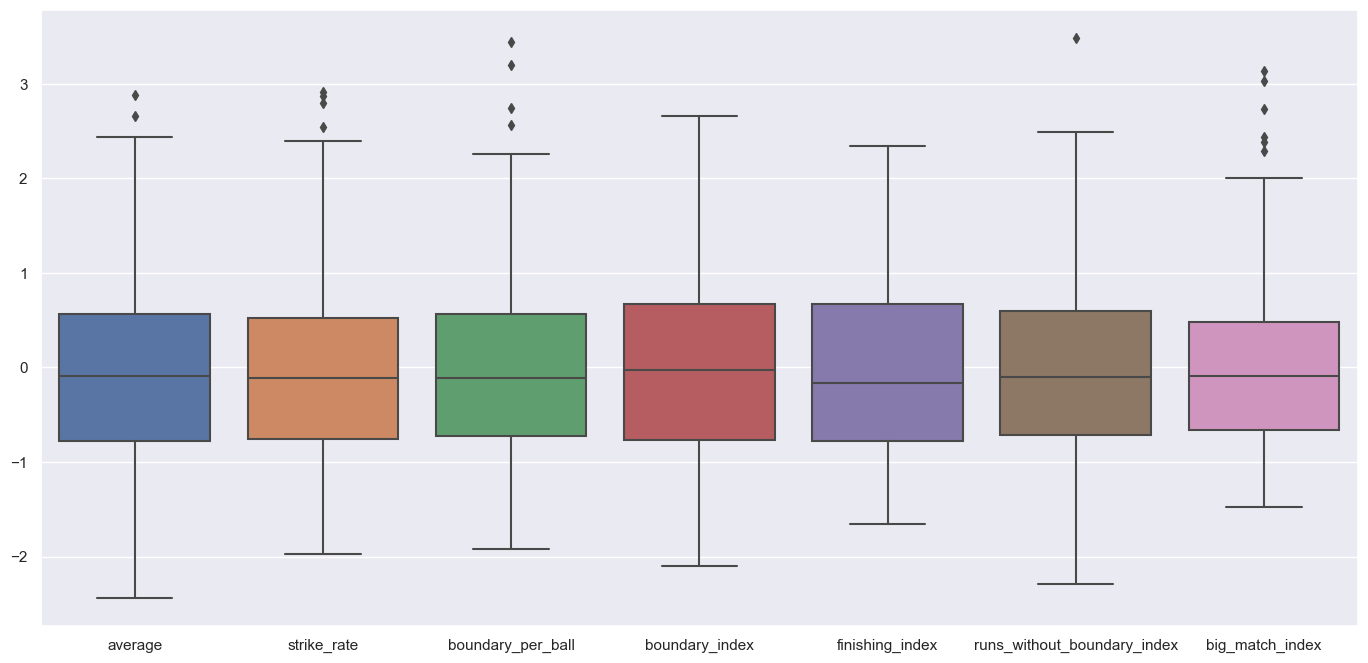

In [149]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_std_Scaler)
plt.show()

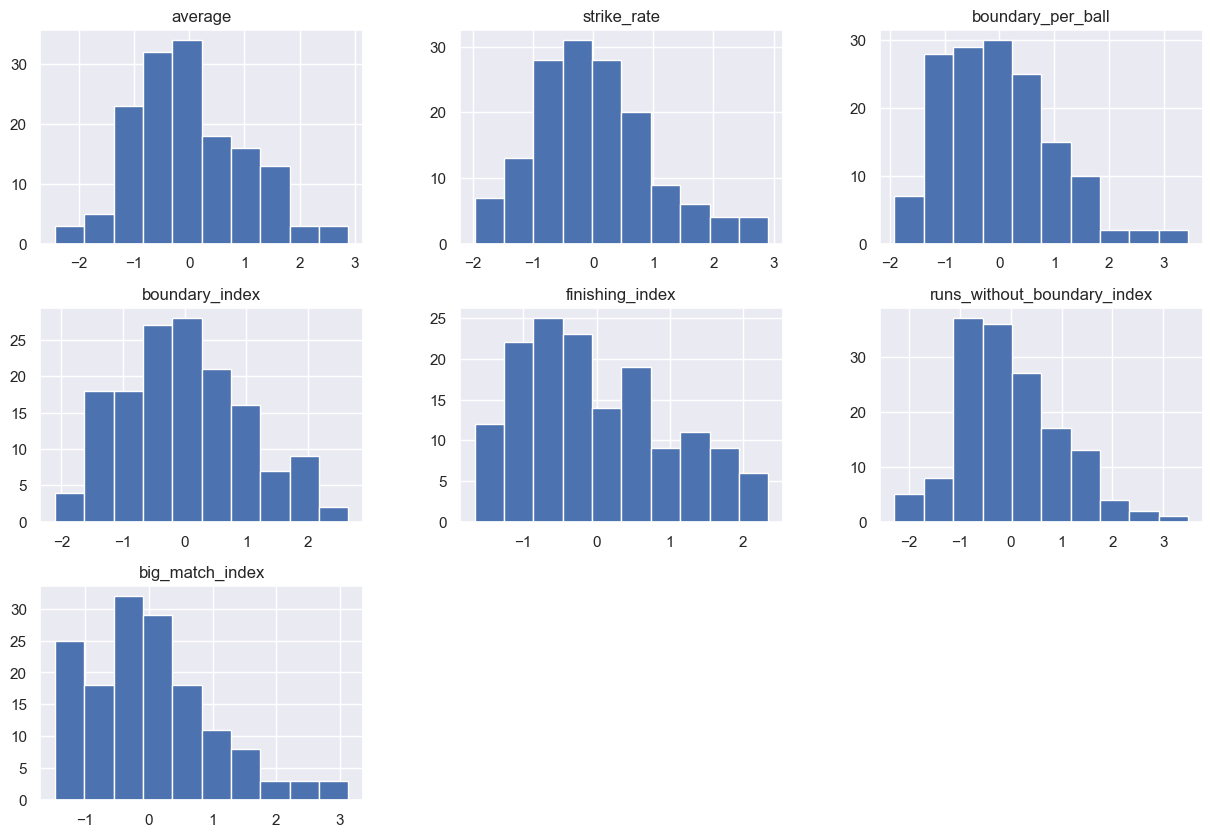

In [150]:

fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_std_Scaler.hist(ax=ax)
plt.show()

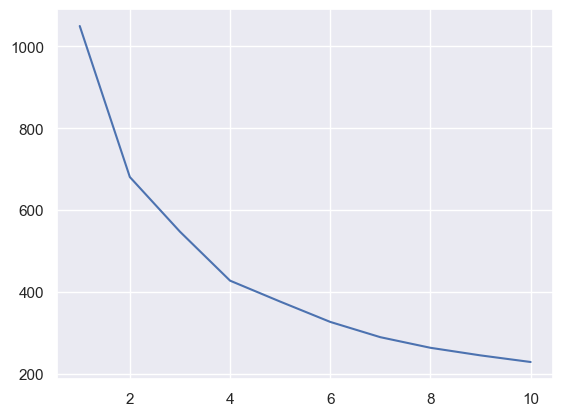

In [151]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_std_Scaler)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [152]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_std_Scaler)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_std_Scaler, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3072665351543321
For n_clusters = 3 The average silhouette_score is : 0.24864208489724415
For n_clusters = 4 The average silhouette_score is : 0.2709869056656255
For n_clusters = 5 The average silhouette_score is : 0.25879051143241183
For n_clusters = 6 The average silhouette_score is : 0.2622858009134456
For n_clusters = 7 The average silhouette_score is : 0.26069558903570994
For n_clusters = 8 The average silhouette_score is : 0.240502742385855
For n_clusters = 9 The average silhouette_score is : 0.26556809408357424
For n_clusters = 10 The average silhouette_score is : 0.2452829985305167


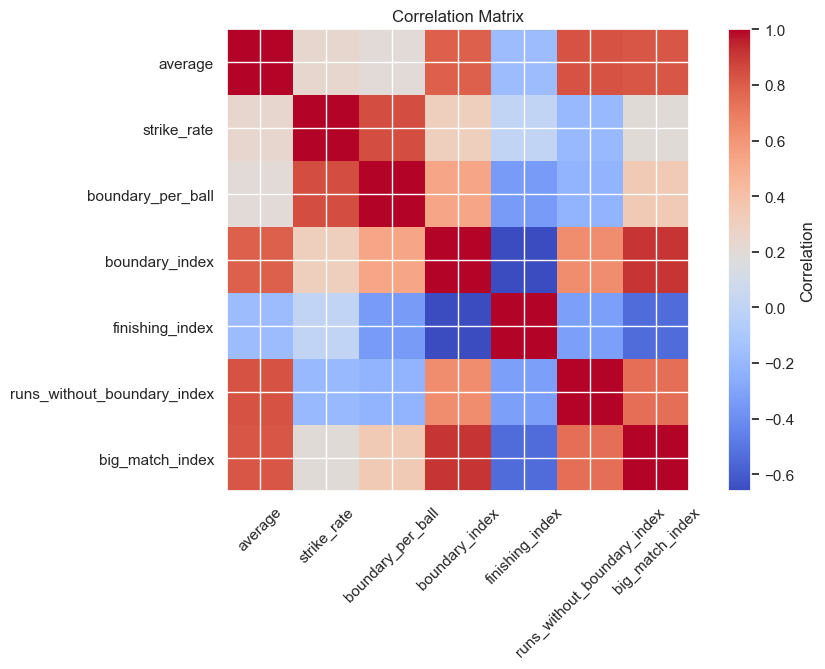

In [156]:
corr_std_scaler = batter_std_Scaler.corr()
plt.figure(figsize=(10, 6))
plt.imshow(corr_std_scaler, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_std_scaler.columns)), corr_std_scaler.columns, rotation=45)
plt.yticks(range(len(corr_std_scaler.columns)), corr_std_scaler.columns)
plt.title('Correlation Matrix')
plt.show()

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
batter_min_max_scaler= scaler.fit_transform(batter_for_clustering)

batter_min_max_scaler = pd.DataFrame(batter_min_max_scaler,columns = columns)
batter_min_max_scaler.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.457752,0.403989,0.357815,0.442033,0.415063,0.396125,0.320268
std,0.188627,0.205439,0.187215,0.210691,0.250717,0.173775,0.217753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.310683,0.249018,0.221751,0.281262,0.220621,0.273040,0.176339
50%,0.441318,0.380256,0.336158,0.437078,0.373614,0.378094,0.301339
75%,0.564150,0.511058,0.463277,0.583218,0.582594,0.498784,0.424107
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


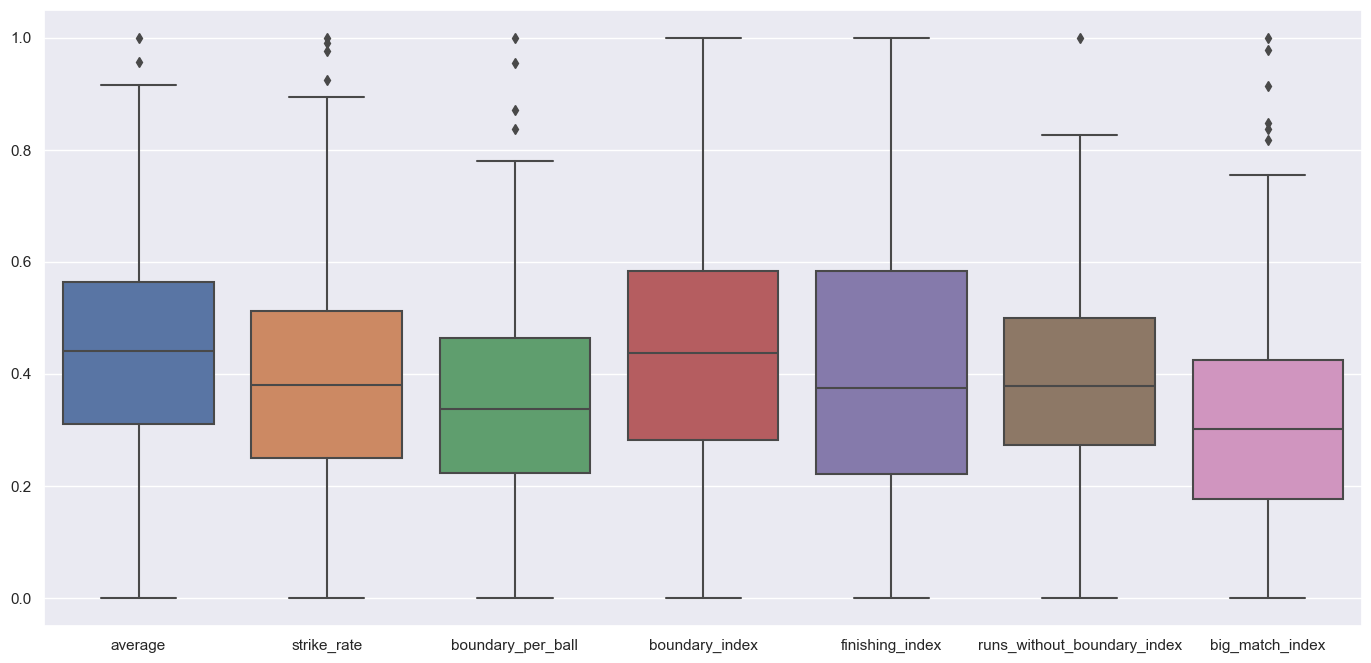

In [159]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_min_max_scaler)
plt.show()

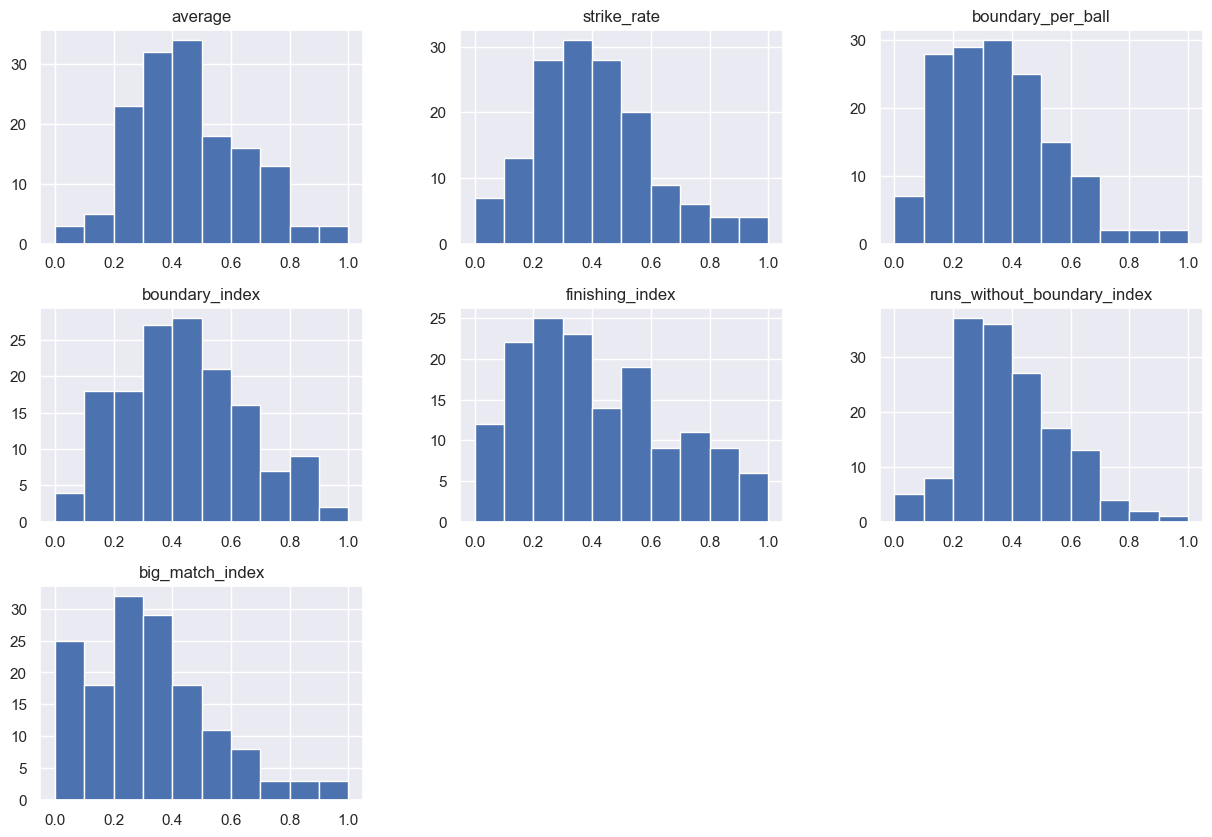

In [160]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_min_max_scaler.hist(ax=ax)
plt.show()

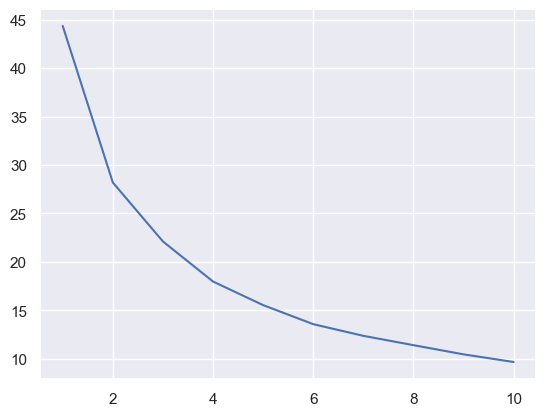

In [161]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_min_max_scaler)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [162]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_min_max_scaler)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_min_max_scaler, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3148332050303846
For n_clusters = 3 The average silhouette_score is : 0.2718448188371214
For n_clusters = 4 The average silhouette_score is : 0.2666076199184653
For n_clusters = 5 The average silhouette_score is : 0.2662958641554081
For n_clusters = 6 The average silhouette_score is : 0.2619800218706543
For n_clusters = 7 The average silhouette_score is : 0.25412102965286854
For n_clusters = 8 The average silhouette_score is : 0.24461580670294608
For n_clusters = 9 The average silhouette_score is : 0.2517601841981766
For n_clusters = 10 The average silhouette_score is : 0.24048965437115313


<Axes: >

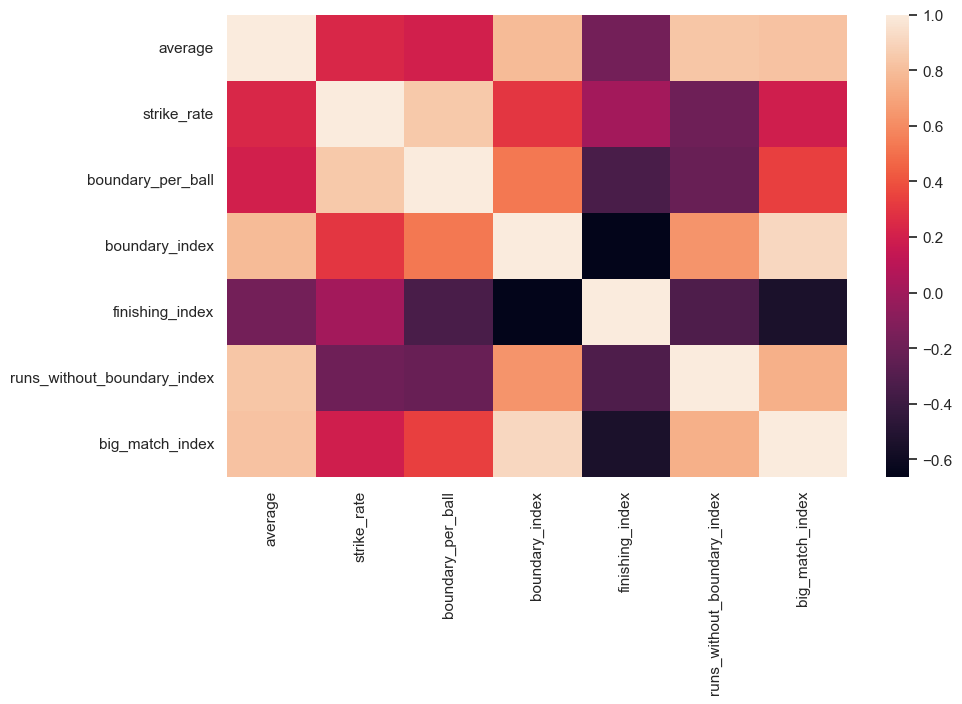

In [164]:
corr_min_max_scaler = batter_min_max_scaler.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_min_max_scaler)

In [165]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
batter_normalize= scaler.fit_transform(batter_for_clustering)

batter_normalize = pd.DataFrame(batter_normalize,columns = columns)
batter_normalize.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.205248,0.974750,0.001271,0.022041,0.001371,0.066243,0.001029
std,0.047235,0.011834,0.000143,0.007084,0.000845,0.021297,0.000672
min,0.090631,0.939274,0.000954,0.007412,0.000000,0.016139,0.000000
25%,0.172444,0.966851,0.001172,0.016960,0.000725,0.051191,0.000533
50%,0.199964,0.977271,0.001263,0.021690,0.001188,0.063888,0.000982
75%,0.236172,0.983434,0.001347,0.026896,0.001980,0.078433,0.001389
max,0.323412,0.995712,0.001691,0.039508,0.003531,0.126352,0.003355


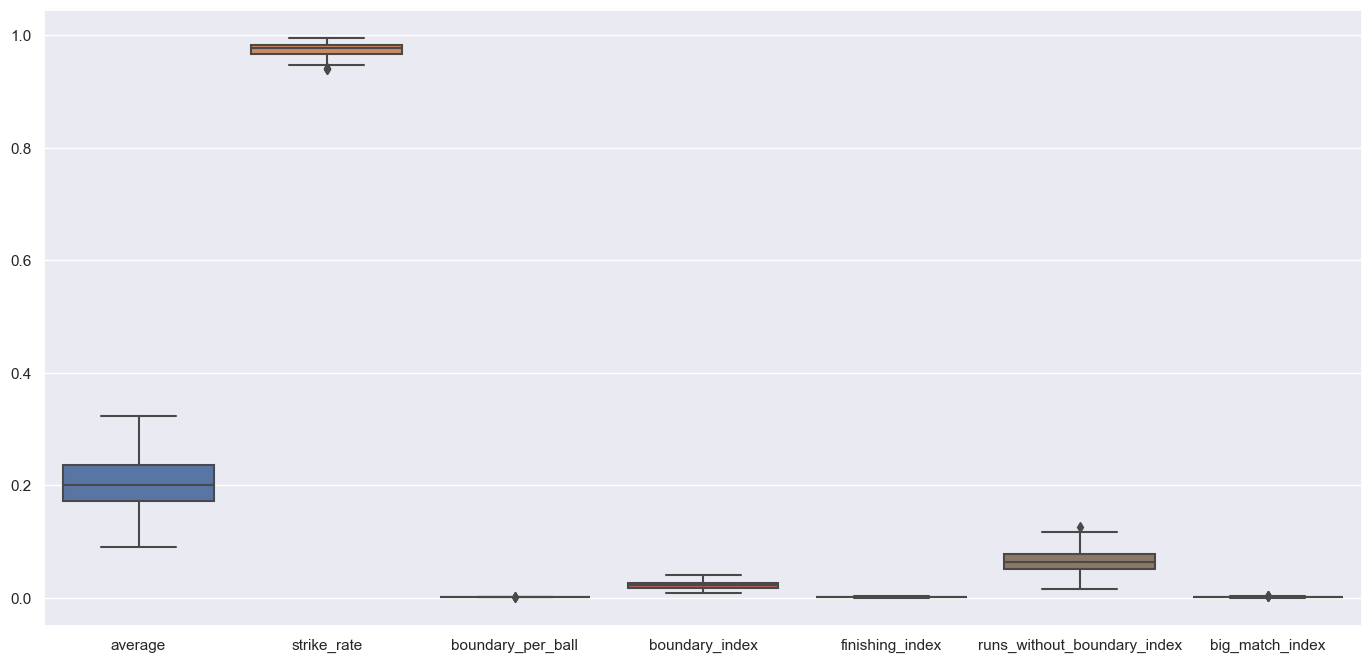

In [166]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_normalize)
plt.show()

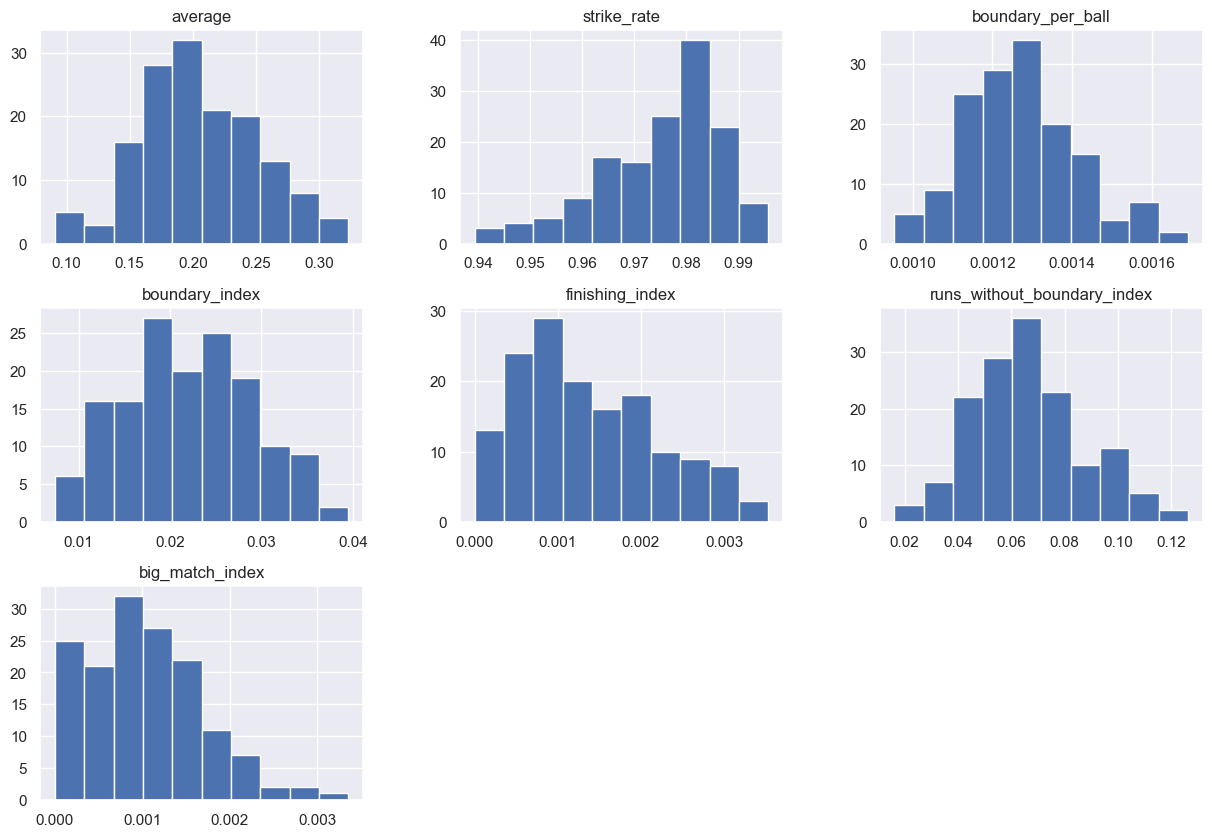

In [167]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_normalize.hist(ax=ax)
plt.show()

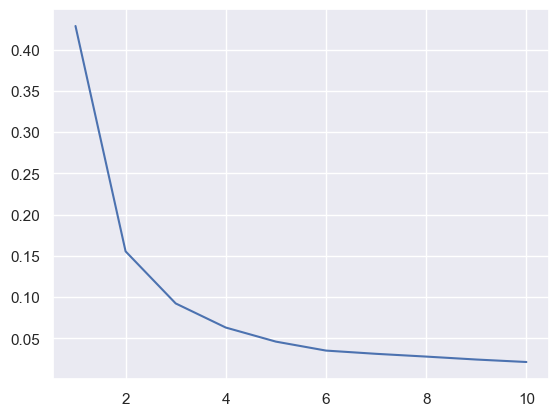

In [168]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_normalize)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [169]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_normalize)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_normalize, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.5334801443529815
For n_clusters = 3 The average silhouette_score is : 0.4515062478209161
For n_clusters = 4 The average silhouette_score is : 0.42775568665375585
For n_clusters = 5 The average silhouette_score is : 0.4190076538279021
For n_clusters = 6 The average silhouette_score is : 0.3984955063595039
For n_clusters = 7 The average silhouette_score is : 0.37238124702379327
For n_clusters = 8 The average silhouette_score is : 0.37132324451443743
For n_clusters = 9 The average silhouette_score is : 0.3406700154274958
For n_clusters = 10 The average silhouette_score is : 0.34443311570303603


<Axes: >

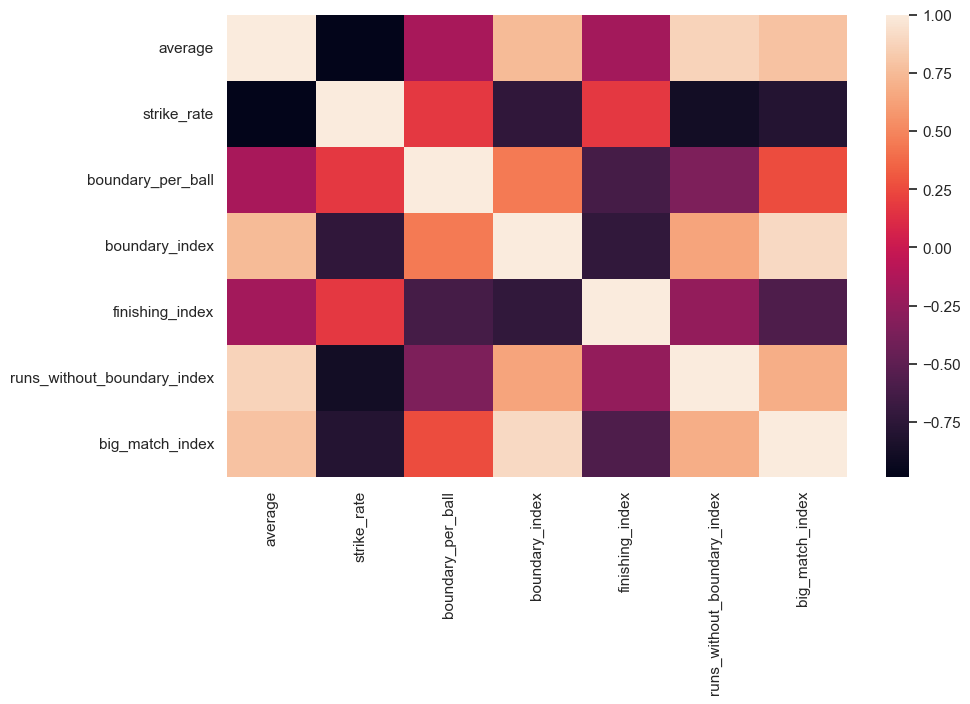

In [170]:
corr_normalize = batter_normalize.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_normalize)

In [171]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
batter_robust= scaler.fit_transform(batter_for_clustering)

batter_robust = pd.DataFrame(batter_robust,columns = columns)
batter_robust.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,1.500000e+02,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,150.000000
mean,6.483908e-02,0.090568,0.089669,1.640756e-02,0.114507,7.987294e-02,0.076396
std,7.441842e-01,0.783998,0.775135,6.977545e-01,0.692640,7.697896e-01,0.878858
min,-1.741121e+00,-1.451138,-1.391813,-1.447494e+00,-1.032159,-1.674884e+00,-1.216216
25%,-5.153907e-01,-0.500833,-0.473684,-5.160230e-01,-0.422665,-4.653684e-01,-0.504505
50%,-1.869165e-16,0.000000,0.000000,1.457168e-16,0.000000,-2.453550e-16,0.000000
75%,4.846093e-01,0.499167,0.526316,4.839770e-01,0.577335,5.346316e-01,0.495495
max,2.204157e+00,2.365075,2.748538,1.864256e+00,1.730475,2.754920e+00,2.819820


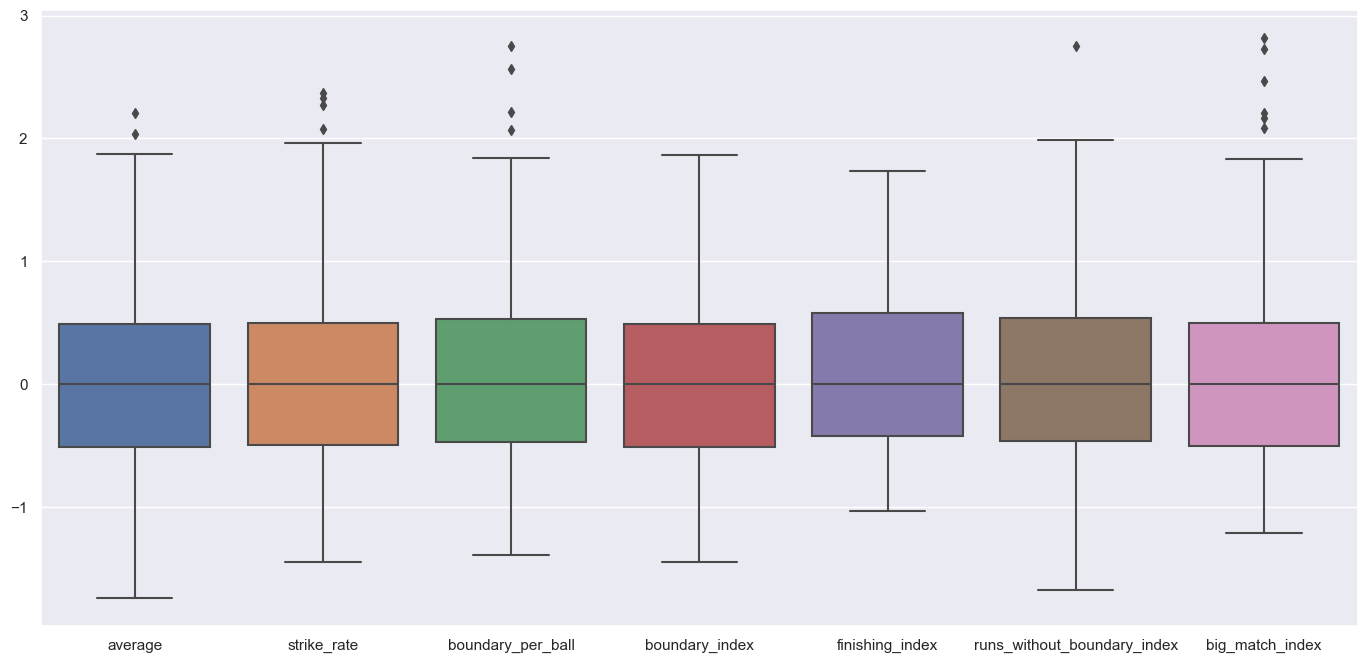

In [172]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_robust)
plt.show()

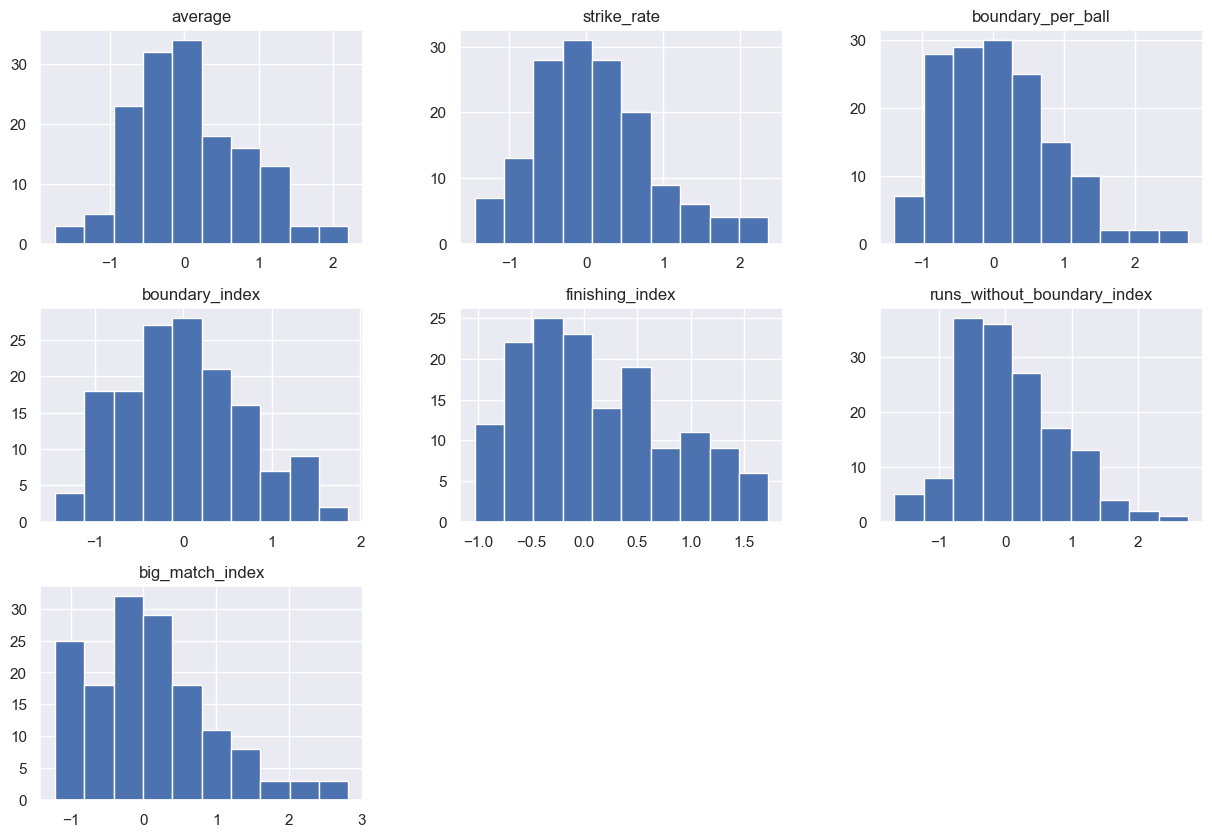

In [173]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_robust.hist(ax=ax)
plt.show()

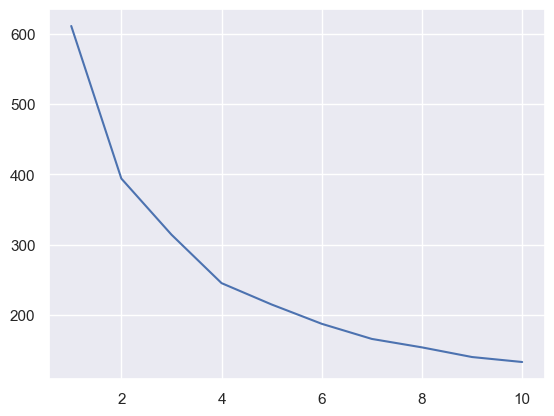

In [174]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_robust)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [175]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_robust)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_robust, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3134154496509431
For n_clusters = 3 The average silhouette_score is : 0.28891649351040255
For n_clusters = 4 The average silhouette_score is : 0.2726072152941893
For n_clusters = 5 The average silhouette_score is : 0.25992903283172664
For n_clusters = 6 The average silhouette_score is : 0.2524660846671298
For n_clusters = 7 The average silhouette_score is : 0.26359806456096674
For n_clusters = 8 The average silhouette_score is : 0.26877349094118763
For n_clusters = 9 The average silhouette_score is : 0.2593349473361564
For n_clusters = 10 The average silhouette_score is : 0.24938825876211126


<Axes: >

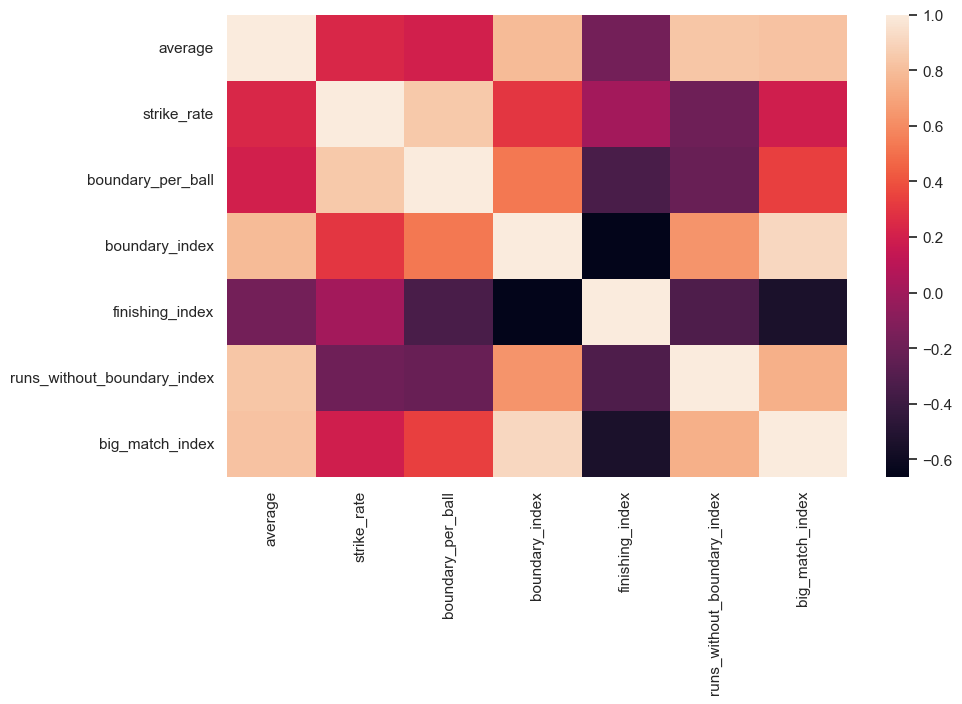

In [176]:
corr_robust = batter_robust.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_robust)

In [177]:
batter_nn = batter_for_clustering.copy()
batter_nn['average'] = (batter_nn['average'] - np.min(batter_nn['average'])) / (np.max(batter_nn['average']) - np.min(batter_nn['average']))
batter_nn['strike_rate'] = (batter_nn['strike_rate'] - np.min(batter_nn['strike_rate'])) / (np.max(batter_nn['strike_rate']) - np.min(batter_nn['strike_rate']))
batter_nn['boundary_per_ball'] = (batter_nn['boundary_per_ball'] - np.min(batter_nn['boundary_per_ball'])) / (np.max(batter_nn['boundary_per_ball']) - np.min(batter_nn['boundary_per_ball']))
batter_nn['boundary_index'] = (batter_nn['boundary_index'] - np.min(batter_nn['boundary_index'])) / (np.max(batter_nn['boundary_index']) - np.min(batter_nn['boundary_index']))
batter_nn['finishing_index'] = (batter_nn['finishing_index'] - np.min(batter_nn['finishing_index'])) / (np.max(batter_nn['finishing_index']) - np.min(batter_nn['finishing_index']))
batter_nn['runs_without_boundary_index'] = (batter_nn['runs_without_boundary_index'] - np.min(batter_nn['runs_without_boundary_index'])) / (np.max(batter_nn['runs_without_boundary_index']) - np.min(batter_nn['runs_without_boundary_index']))
batter_nn['big_match_index'] = (batter_nn['big_match_index'] - np.min(batter_nn['big_match_index'])) / (np.max(batter_nn['big_match_index']) - np.min(batter_nn['big_match_index']))

In [178]:
batter_nn = pd.DataFrame(batter_nn,columns = columns)
batter_nn.describe()

,average,strike_rate,boundary_per_ball,boundary_index,finishing_index,runs_without_boundary_index,big_match_index
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.457752,0.403989,0.357815,0.442033,0.415063,0.396125,0.320268
std,0.188627,0.205439,0.187215,0.210691,0.250717,0.173775,0.217753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.310683,0.249018,0.221751,0.281262,0.220621,0.273040,0.176339
50%,0.441318,0.380256,0.336158,0.437078,0.373614,0.378094,0.301339
75%,0.564150,0.511058,0.463277,0.583218,0.582594,0.498784,0.424107
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


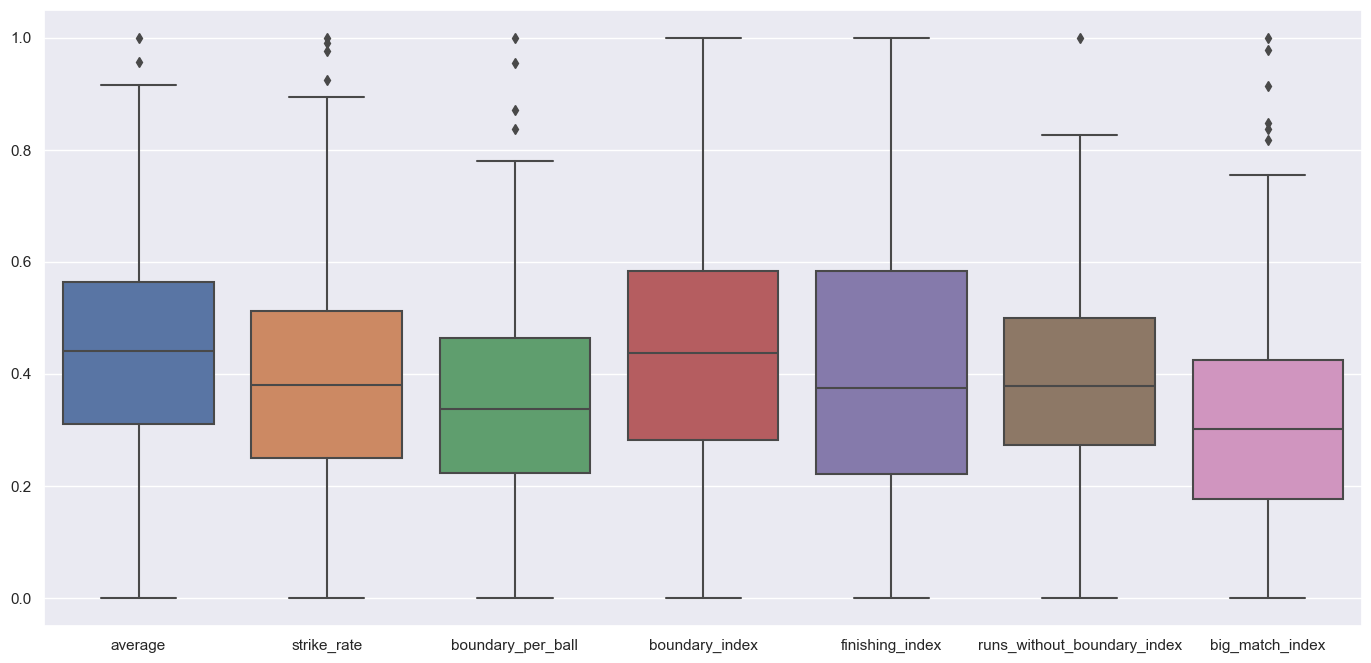

In [179]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=batter_nn)
plt.show()

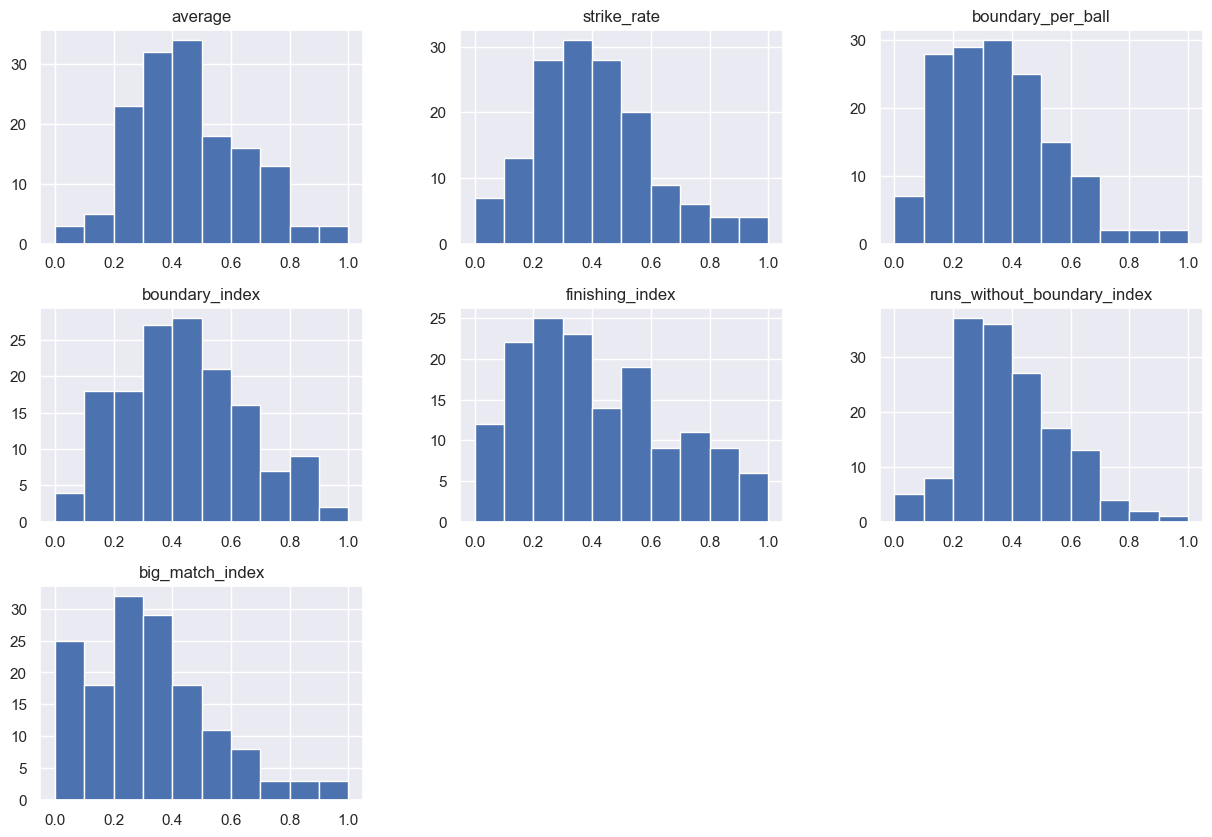

In [180]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
batter_nn.hist(ax=ax)
plt.show()

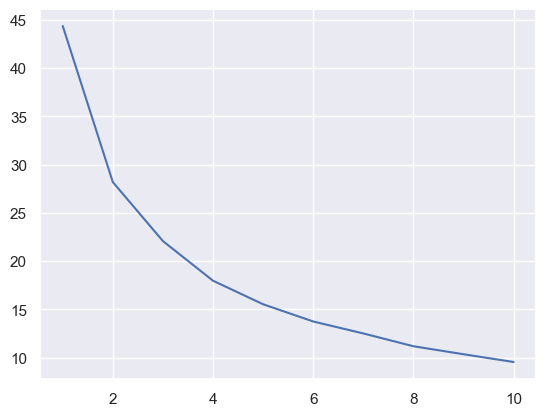

In [181]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(batter_nn)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [182]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(batter_nn)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(batter_nn, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.31483320503038464
For n_clusters = 3 The average silhouette_score is : 0.2718448188371215
For n_clusters = 4 The average silhouette_score is : 0.2666076199184653
For n_clusters = 5 The average silhouette_score is : 0.26629586415540824
For n_clusters = 6 The average silhouette_score is : 0.2619800218706544
For n_clusters = 7 The average silhouette_score is : 0.25412102965286865
For n_clusters = 8 The average silhouette_score is : 0.24461580670294614
For n_clusters = 9 The average silhouette_score is : 0.25176018419817664
For n_clusters = 10 The average silhouette_score is : 0.24048965437115327


<Axes: >

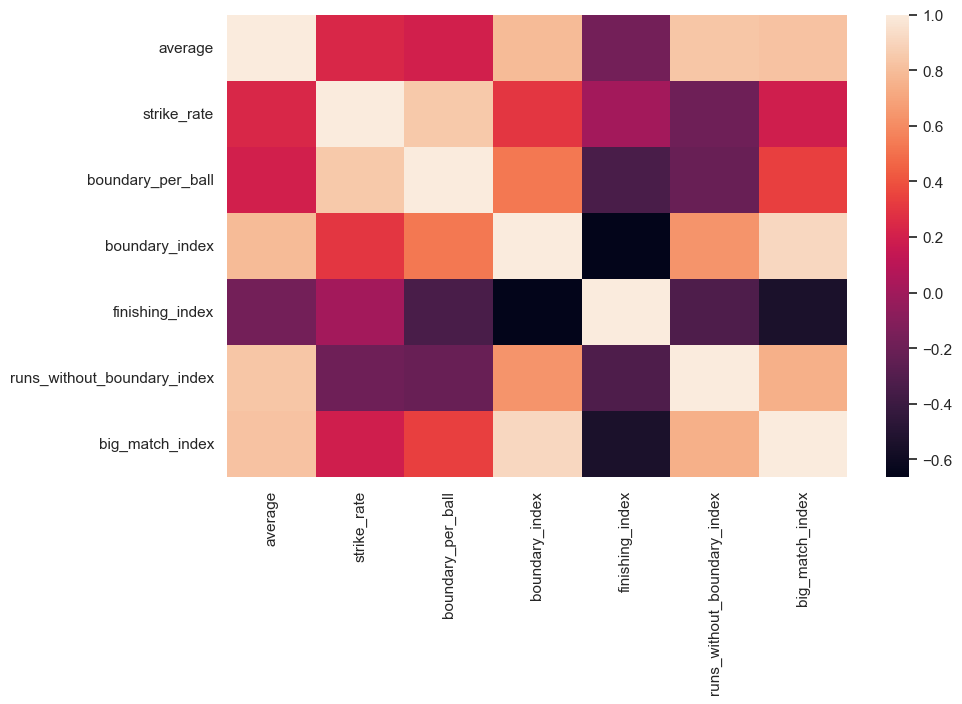

In [183]:
corr_nn = batter_nn.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_nn)